In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_blobs

In [16]:
x,y = make_blobs(n_samples = 200, n_features = 2, centers = [[2,2], [10,10]], cluster_std = 2.4)

In [ ]:
x

array([[ 2.63208133,  1.36106809],
       [ 1.31740171,  1.86894813],
       [ 9.05769904, 10.74569364],
       [ 2.29406663,  3.01327586],
       [ 1.78171947,  1.54455279],
       [ 1.84968798,  3.41204472],
       [10.99686502,  8.80855827],
       [11.42667674,  9.22593791],
       [ 2.0066577 ,  1.16486885],
       [10.30662563,  9.36803516],
       [ 2.22831993,  2.26440118],
       [ 2.3401903 ,  3.49632355],
       [ 8.99882164, 10.33557783],
       [ 9.19404619, 10.50759805],
       [ 9.6513094 , 10.19945689],
       [ 9.29212986,  9.93331176],
       [ 1.45226086,  2.52619579],
       [ 1.91024797,  2.65473908],
       [ 2.00043254,  1.45035516],
       [ 8.62261762, 10.23062649],
       [10.42362928, 11.72537023],
       [ 2.3229914 ,  0.65577498],
       [ 8.95707105, 10.24716752],
       [ 1.70217519,  1.4110937 ],
       [ 1.39086912,  2.2063861 ],
       [ 0.53323261,  2.95082615],
       [ 3.31957768,  1.00933975],
       [ 9.44113693, 12.28521115],
       [ 9.85956335,

In [17]:
y[y==0] = -1

In [ ]:
df = pd.DataFrame(x, columns = ['x1', 'x2'])
df['y'] = y
df.head()

,x1,x2,y
0,11.700419,11.955981,1
1,-1.365968,-1.593997,-1
2,-2.361112,4.839743,-1
3,7.478670,6.079984,-1
4,2.880223,-1.991634,-1


<Axes: xlabel='x1', ylabel='x2'>

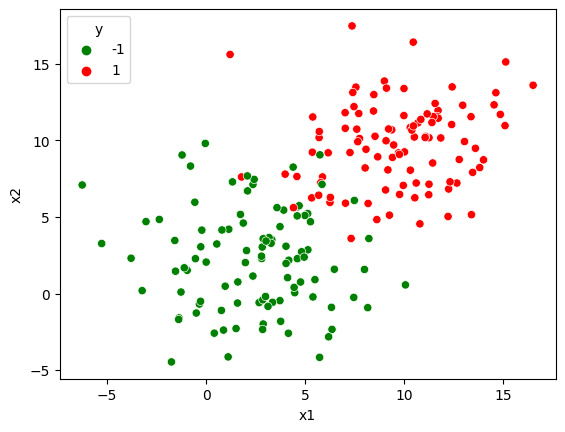

In [ ]:
sns.scatterplot(x= df['x1'], y = df['x2'], hue = df['y'], palette = ['g', 'r'])

In [ ]:
x_val = np.linspace(0,12,100)

In [ ]:
x_val

array([ 0.        ,  0.12121212,  0.24242424,  0.36363636,  0.48484848,
        0.60606061,  0.72727273,  0.84848485,  0.96969697,  1.09090909,
        1.21212121,  1.33333333,  1.45454545,  1.57575758,  1.6969697 ,
        1.81818182,  1.93939394,  2.06060606,  2.18181818,  2.3030303 ,
        2.42424242,  2.54545455,  2.66666667,  2.78787879,  2.90909091,
        3.03030303,  3.15151515,  3.27272727,  3.39393939,  3.51515152,
        3.63636364,  3.75757576,  3.87878788,  4.        ,  4.12121212,
        4.24242424,  4.36363636,  4.48484848,  4.60606061,  4.72727273,
        4.84848485,  4.96969697,  5.09090909,  5.21212121,  5.33333333,
        5.45454545,  5.57575758,  5.6969697 ,  5.81818182,  5.93939394,
        6.06060606,  6.18181818,  6.3030303 ,  6.42424242,  6.54545455,
        6.66666667,  6.78787879,  6.90909091,  7.03030303,  7.15151515,
        7.27272727,  7.39393939,  7.51515152,  7.63636364,  7.75757576,
        7.87878788,  8.        ,  8.12121212,  8.24242424,  8.36

In [18]:
# w0 = 0
# w = [1,1]

w = np.random.normal(size = (2,))
w0 = np.random.normal()

In [ ]:
w

array([0.11246819, 1.45914692])

In [ ]:
w0

0.3734709781540821

In [ ]:
y_val = (-w0-w[0]*x_val)/w[1]

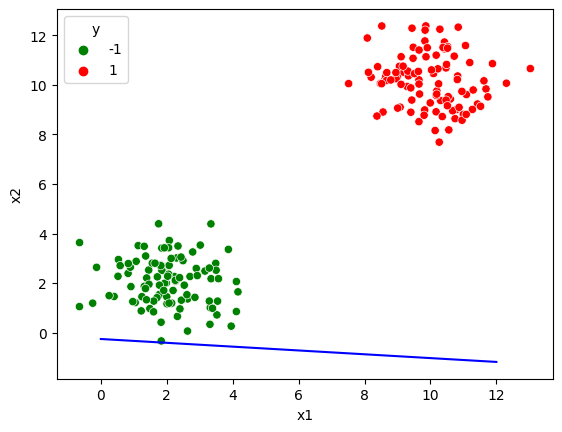

In [ ]:
sns.scatterplot(x= df['x1'], y = df['x2'], hue = df['y'], palette = ['g', 'r'])
plt.plot(x_val, y_val, c = 'b')
plt.show()

In [ ]:
w = np.random.normal(size = (2,))
w0 = np.random.normal()

In [5]:
def plot_line(w,w0,x,y):
  x_val = np.linspace(0,12,100)
  y_val = (-w0-w[0]*x_val)/w[1]
  sns.scatterplot(x= x[:,0], y = x[:,1], hue = y, palette = ['g', 'r'])
  plt.plot(x_val, y_val, c = 'b')
  plt.show()

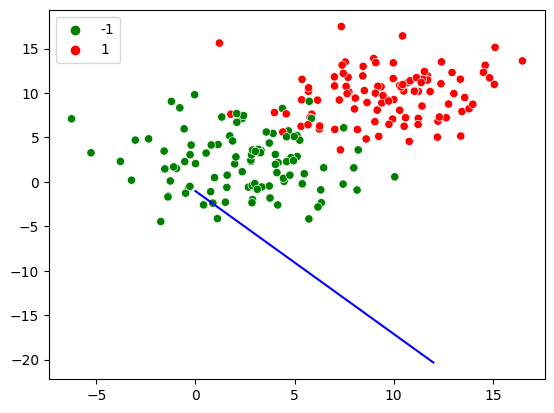

In [ ]:
plot_line(w,w0,x,y)

In [6]:
def distance_from_line(w,w0,x):
  d = (np.dot(w,x)+w0)/np.linalg.norm(w)
  return d

In [ ]:
distance_from_line(w,w0,[10,5])

-5.63315678527947

In [ ]:
np.sign(-5.63315678527947)

-1.0

In [7]:
def classifier(w, w0, x, y, iters = 100):
  l = []
  for i in range(iters):
    num_of_misclassifications = 0
    for xi,yi in zip(x,y):
      dist = distance_from_line(w,w0,xi)
      hs = np.sign(dist)
      if hs != yi:
        num_of_misclassifications +=1
        w = w + (xi*yi)
        w0 = w0 + yi
    print("Accuracy: {}".format(100-(100*num_of_misclassifications/len(y))))
    print("Weight: w0 = {}, w1 = {}, w2 = {}".format(w0,w[0], w[1]))
    plot_line(w, w0, x,y)
    l.append(100*num_of_misclassifications/len(y))
    if num_of_misclassifications == 0:
      return w, w0, l
  return w,w0, l


In [19]:
w,w0,l = classifier(w, w0, x, y, iters = 100)

Output hidden; open in https://colab.research.google.com to view.

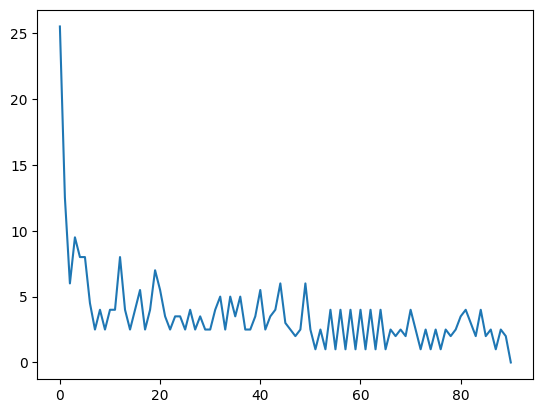

In [20]:

plt.plot(l)

In [21]:
# 2 features: 8 Sec
((201)**3)*(10**-6)

8.120600999999999

In [24]:
# 3 features: 27mins
((201)**4)*(10**-6)/(60)

27.20401335

In [26]:
# 4 features: 91hrs
((201)**5)*(10**-6)/(3600)

91.13344472249999

In [28]:
# 5 features: Approx 2 years
((201)**6)*(10**-6)/(3600*24)

763.2425995509375

In [30]:
# 6 features: Approx 421 years
((201)**7)*(10**-6)/(3600*24*364)

421.4608860157649

In [31]:
(1.9)**2

3.61

In [32]:
(1.99)**2

3.9601

In [33]:
(1.999)**2

3.9960010000000006

In [34]:
(1.9999)**2

3.99960001

In [35]:
(2.01)**2

4.040099999999999

In [36]:
(2.001)**2

4.004001

In [37]:
(2.0001)**2

4.000400010000001